In [1]:
import numpy as np
import pandas as pd
import h5py

pd.set_option('display.max_rows', 500)

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
use_ant = 0 
limit_time =  0

In [3]:
ant = 'generated_dataset/Antmaze_umaze_fixstart_fixgoal.hdf5'
ant_timelimit = "generated_dataset/Antmaze_umaze_fixstart_fixgoal_timelimit.hdf5" 

In [4]:
point = 'generated_dataset/maze2d-umaze-v1.hdf5'
point_timelimit = "generated_dataset/maze2d-umaze-v1_timelimit.hdf5"

In [5]:
if use_ant:
    if limit_time:
        fname = ant_timelimit
    else:
        fname = ant
else:
    if limit_time:
        fname = point_timelimit
    else:
        fname = point

In [6]:
f = h5py.File(fname, 'r')

list(f.keys())

['actions', 'infos', 'observations', 'rewards', 'terminals']

In [7]:
data = dict(
    act = np.asarray(f['actions']),
    obs = np.asarray(f['observations']),
    done = np.asarray(f['terminals']),
    # timeout = np.asarray(f['timeouts']),
)

In [8]:
for k, v in data.items():
    print(k, v.shape)

act (16039, 2)
obs (16039, 4)
done (16039,)


In [9]:
act_df = pd.DataFrame(data=data['act'])
obs_df = pd.DataFrame(data=data['obs'])
done_df = pd.DataFrame(data=data['done'])
# timeout_df = pd.DataFrame(data=data['timeout'])

In [10]:
obs_df.iloc[:, [0,1,2]].head(5)

,0,1,2
0,3.000000,1.000000,0.000000
1,2.997618,1.002382,-0.238164
2,2.992861,1.007139,-0.475760
3,2.985733,1.014267,-0.712791
4,2.976240,1.023760,-0.949257


In [11]:
def visualize_path_ant(data=None, goal=[0, 8]):
    """ """
    fig = plt.figure()
    offset = -2
    size = 0.25 + 2 * 0.08
    scaling = 4
    # path
    if data is not None:
        plt.plot(data[:, 0], data[:, 1], "o-")
        plt.plot(
            data[0, 0],
            data[0, 1],
            "go",
            markersize=10,
            markeredgecolor="k",
            label="start",
        )
        plt.plot(
            data[-1, 0],
            data[-1, 1],
            "ro",
            markersize=10,
            markeredgecolor="k",
            label="achieved goal",
        )
        # achived goal with radius
        achieved_circle = plt.Circle(
            xy=(data[-1, 0], data[-1, 1]),
            radius=0.1,
            color="r",
            lw=1,
            label="achieved region",
        )
        plt.gca().add_patch(achieved_circle)

    # goal pos
    plt.plot(
        goal[0], goal[1], "bo", markersize=10, markeredgecolor="k", label="desired goal"
    )
    # goal region
    goal_region = plt.Circle(
        xy=(goal[0], goal[1]),
        radius=0.5,
        alpha=0.5,
        color="darkorange",
        lw=1,
        label="goal region",
    )
    plt.gca().add_patch(goal_region)

    # UMaze boundary
    UMaze_x = np.array([0, 3, 3, 0, 0, 2, 2, 0, 0]) * scaling + offset
    UMaze_y = np.array([0, 0, 3, 3, 2, 2, 1, 1, 0]) * scaling + offset
    plt.plot(UMaze_x, UMaze_y, "r")

    # feasible region
    UMaze_feasible_x = UMaze_x + size * np.array([1, -1, -1, 1, 1, 1, 1, 1, 1])
    UMaze_feasible_y = UMaze_y + size * np.array([1, 1, -1, -1, 1, 1, -1, -1, 1])
    plt.plot(UMaze_feasible_x, UMaze_feasible_y, "k--")

    plt.legend()
    plt.grid()

In [12]:
def visualize_path_point(data, goal, save=False):
    """"""
    fig = plt.figure()
    offset = 0.3
    size = 0.1
    
    # path
    plt.plot(data[:, 0], data[:, 1], "x-")

    plt.plot(
        data[0, 0],
        data[0, 1],
        "go",
        markersize=10,
        markeredgecolor="k", 
        label="start"
    )
    plt.plot(
        data[-1, 0],
        data[-1, 1],
        "ro",
        markersize=10,
        markeredgecolor="k",
        label="achieved goal",
    )
    plt.plot(
        goal[0],
        goal[1],
        "bo",
        markersize=10,
        markeredgecolor="k",
        label="desired goal"
    )

    # UMaze boundary
    UMaze_x = np.array([0., 1., 1., 2., 2., 3., 3., 0., 0.]) + offset
    UMaze_y = np.array([0., 0., 2., 2., 0., 0., 3., 3., 0.]) + offset
    plt.plot(UMaze_x, UMaze_y, "r")
    
    
    # feasible region
    # UMaze_feasible_x = np.array([0.1, 0.9, 0.9, 2.1, 2.1, 2.9, 2.9, 0.1, 0.1]) + offset
    UMaze_feasible_x = UMaze_x.copy()
    UMaze_feasible_x[0] += size
    UMaze_feasible_x[1:3] -= size
    UMaze_feasible_x[3:5] += size
    UMaze_feasible_x[5:7] -= size
    UMaze_feasible_x[7:] += size
    
    # UMaze_feasible_y = np.array([0.1, 0.1, 2.1, 2.1, 0.1, 0.1, 2.9, 2.9, 0.1]) + offset
    UMaze_feasible_y = UMaze_y.copy()
    UMaze_feasible_y[:6] += size
    UMaze_feasible_y[6:8] -= size
    UMaze_feasible_y[8] += size
    plt.plot(UMaze_feasible_x, UMaze_feasible_y, "k--")
    
    # achived goal with radius
    achieved_circle = plt.Circle(
        xy=(data[-1, 0], data[-1, 1]),
        radius=0.1,
        color="r",
        lw=1,
        label="achieved region"
    )
    plt.gca().add_patch(achieved_circle)
    
    # goal region
    goal_region = plt.Circle(
        xy=(goal[0], goal[1]),
        radius=0.5,
        alpha=0.5,
        color="darkorange",
        lw=1, 
        label="goal region",
    )
    plt.gca().add_patch(goal_region)
    
    plt.legend()
    plt.grid()

In [13]:
lst = []
i = 0

while i < data['obs'].shape[0]:
    if data['done'][i]:
        lst.append(i)
    i += 1
print(lst)
assert len(lst) == 100 

[159, 316, 476, 640, 805, 965, 1128, 1291, 1450, 1608, 1769, 1928, 2090, 2252, 2419, 2584, 2747, 2911, 3070, 3227, 3390, 3550, 3711, 3871, 4032, 4193, 4350, 4509, 4665, 4825, 4985, 5144, 5302, 5461, 5617, 5780, 5940, 6100, 6260, 6423, 6580, 6742, 6900, 7062, 7224, 7381, 7538, 7696, 7857, 8016, 8173, 8332, 8491, 8649, 8804, 8966, 9127, 9285, 9448, 9608, 9770, 9928, 10087, 10247, 10408, 10571, 10732, 10895, 11054, 11213, 11372, 11534, 11694, 11853, 12011, 12168, 12329, 12488, 12647, 12803, 12964, 13128, 13293, 13454, 13616, 13778, 13941, 14101, 14260, 14419, 14580, 14741, 14905, 15067, 15230, 15390, 15549, 15713, 15873, 16038]


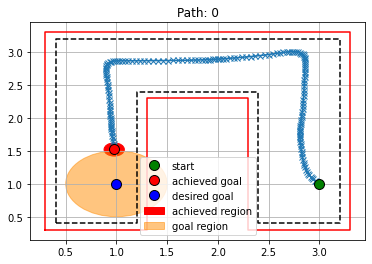

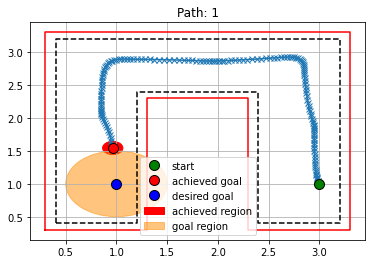

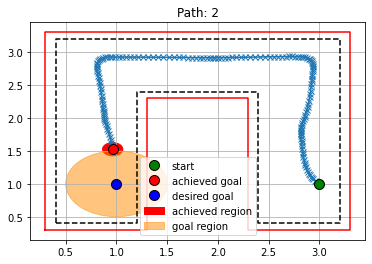

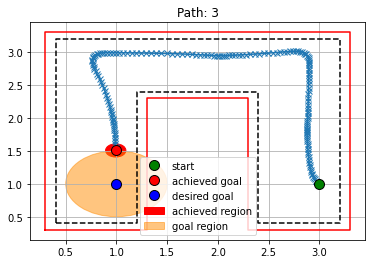

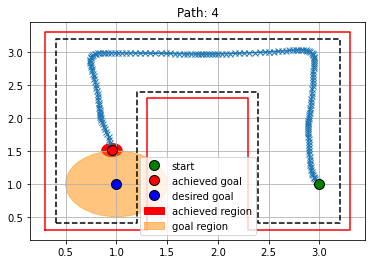

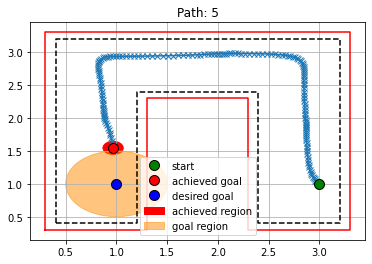

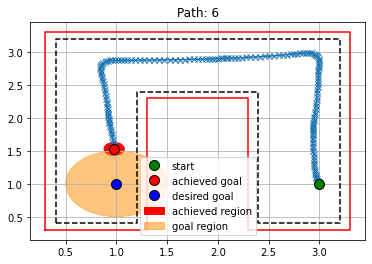

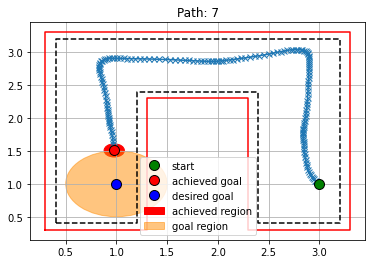

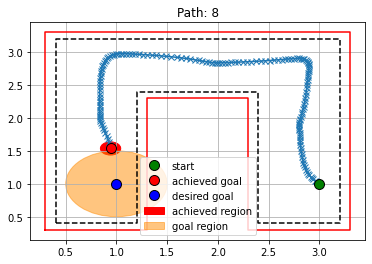

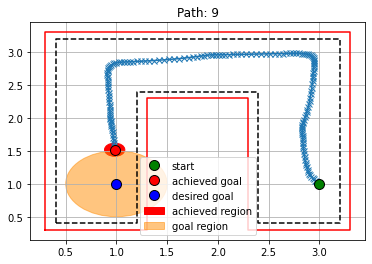

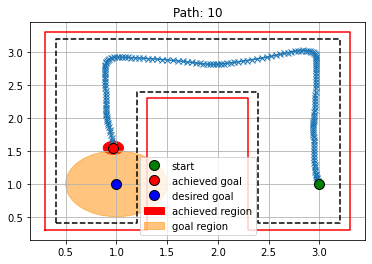

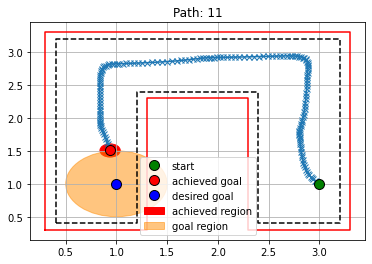

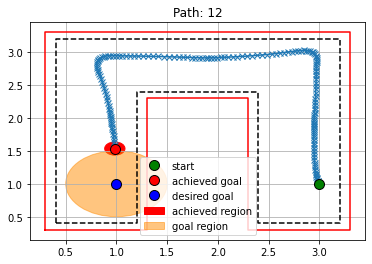

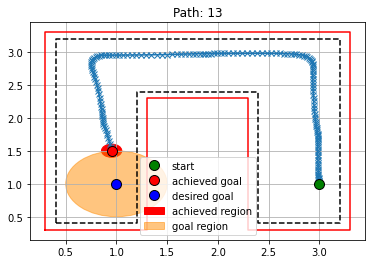

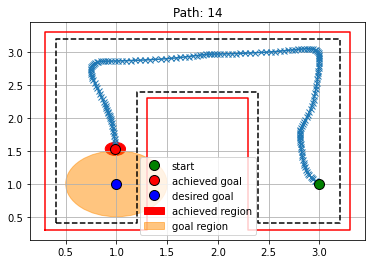

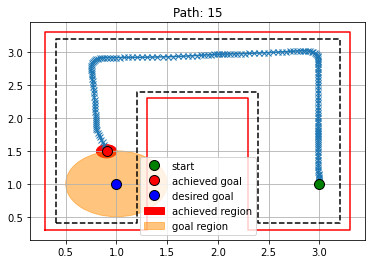

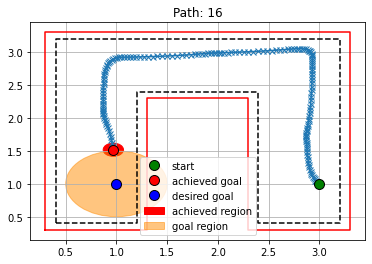

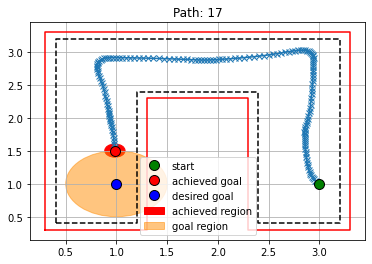

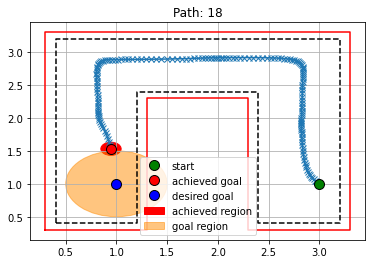

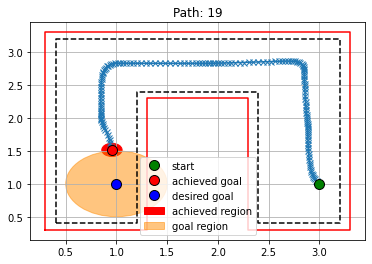

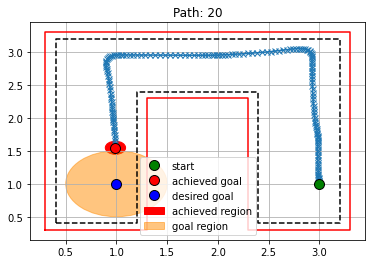

In [14]:
i = 0
for num, j in enumerate(lst):
    if use_ant:
        visualize_path_ant(data['obs'][i:j, :2], goal=[0, 8])
    else:
        visualize_path_point(data['obs'][i:j, :2], goal=[1, 1])
    plt.title("Path: {}".format(num))
    plt.show()
    i = j+1
    
    if num == 20:
        break
    